In [1]:
import seaborn as sns

import warnings; warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV

1.1 Data processing

In [2]:
file = "./Desktop/penguins.csv"
data = pd.read_csv(file)

In [3]:
# Count NA values in each column
print(data.isna().sum())
# Drop the NA values
data.dropna(inplace=True)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


1.2 Data statistics

In [4]:
data.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


In [5]:
penguins_cols = ['species', 'island', 'sex'] # Categorical columns
data[penguins_cols].describe()

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,MALE
freq,146,163,168


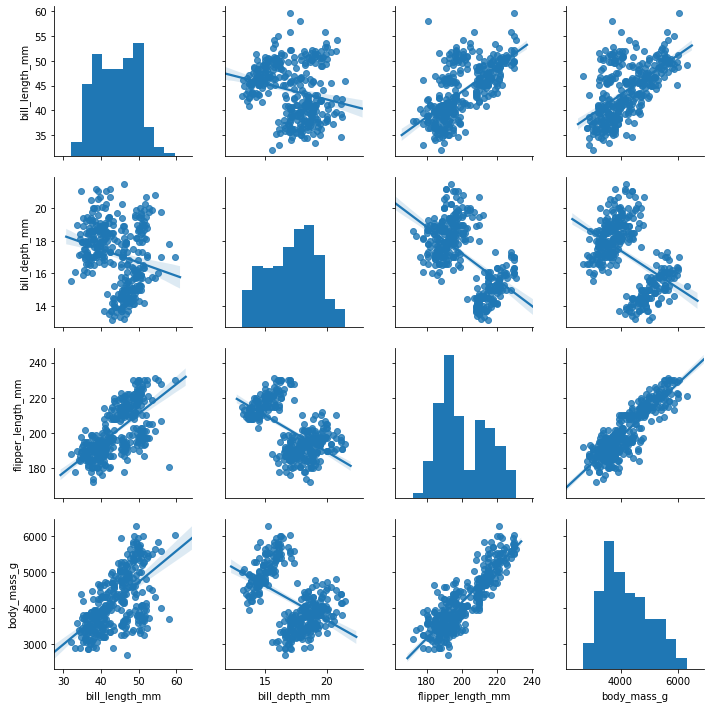

In [6]:
sns.pairplot(data, kind = 'reg', diag_kind = 'hist')
plt.show()

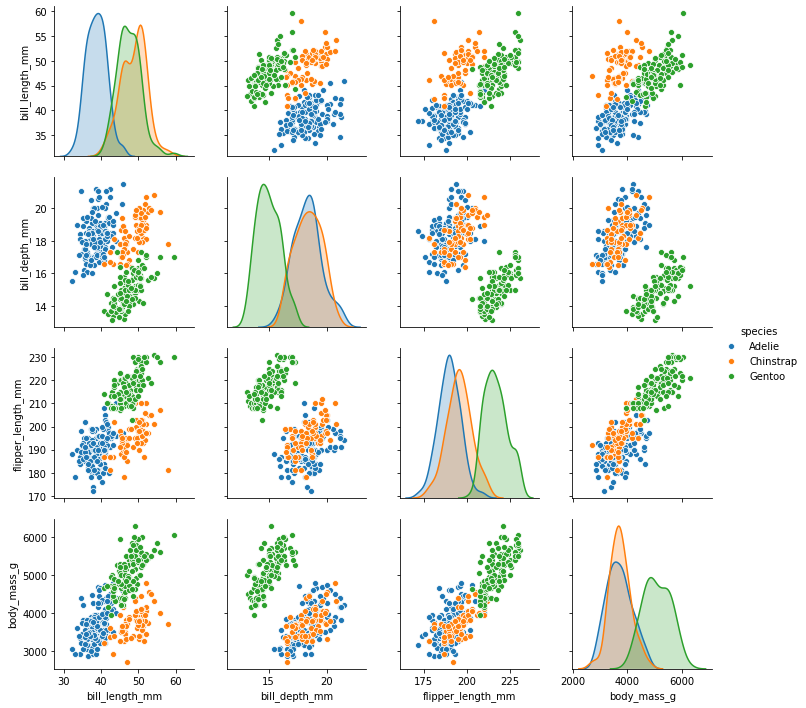

In [7]:
sns.pairplot(data, hue ='species')
plt.savefig('4.png')
plt.show()

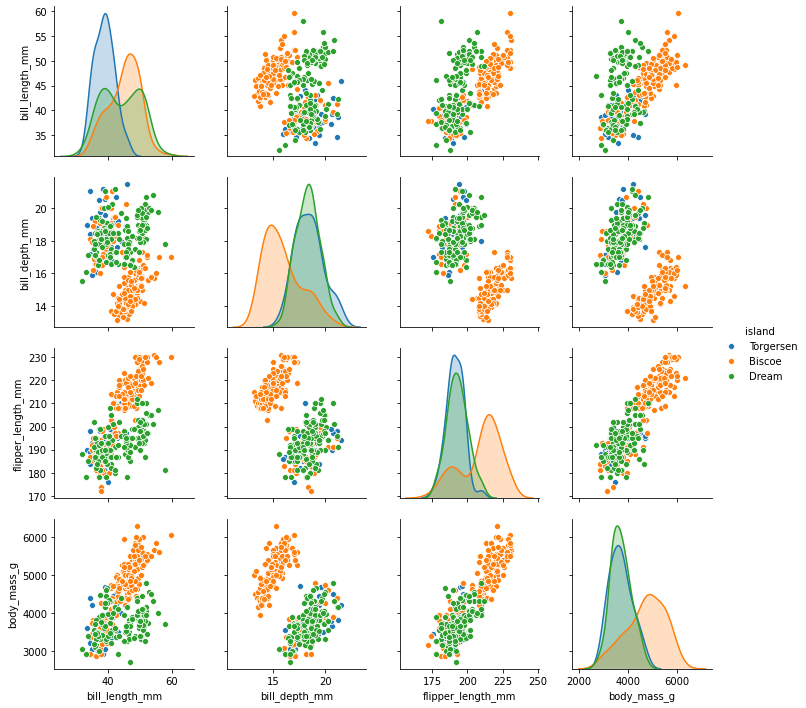

In [8]:
sns.pairplot(data, hue ='island')
plt.savefig('4.png')
plt.show()

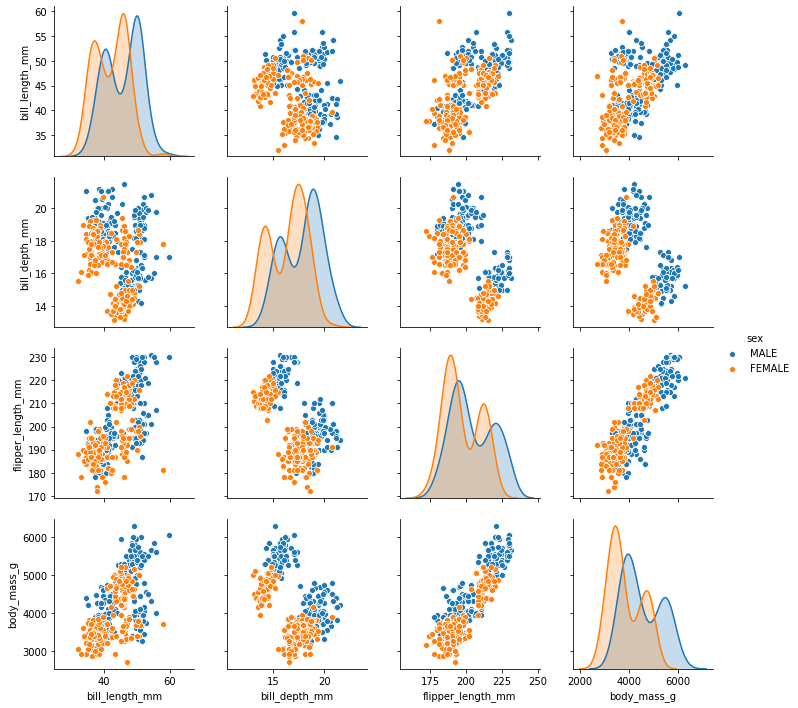

In [9]:
sns.pairplot(data, hue ='sex')
plt.savefig('4.png')
plt.show()

In [11]:
#1.3 Decision Tree

In [12]:
## 其对应的类别标签为'Adelie Penguin', 'Gentoo penguin', 'Chinstrap penguin'三种不同企鹅的类别。
data['species'].unique()

'''为了方便我们将标签转化为数字
       'Adelie Penguin (Pygoscelis adeliae)'        ------0
       'Gentoo penguin (Pygoscelis papua)'          ------1
       'Chinstrap penguin (Pygoscelis antarctica)   ------2 '''

def trans(x):
    if x == data['species'].unique()[0]:
        return 0
    if x == data['species'].unique()[1]:
        return 1
    if x == data['species'].unique()[2]:
        return 2

data['species'] = data['species'].apply(trans)

data['island'].unique()
def trans(x):
    if x == data['island'].unique()[0]:
        return 0
    if x == data['island'].unique()[1]:
        return 1
    if x == data['island'].unique()[2]:
        return 2

data['island'] = data['island'].apply(trans)

data['sex'].unique()
def trans(x):
    if x == data['sex'].unique()[0]:
        return 0
    if x == data['sex'].unique()[1]:
        return 1
    if x == data['sex'].unique()[2]:
        return 1

data['sex'] = data['sex'].apply(trans)

In [13]:
## 为了正确评估模型性能，将数据划分为训练集和测试集，并在训练集上训练模型，在测试集上验证模型性能。
from sklearn.model_selection import train_test_split

## 选择其类别为0和1和2的样本
data_target_part = data[data['species'].isin([0,1,2])][['species']]
data_features_part = data[data['species'].isin([0,1,2])][['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']]

# 25%， 75%
x_train, x_test, y_train, y_test = train_test_split(data_features_part, data_target_part, test_size = 0.25, random_state = 2020)

In [14]:
max_defth_list = [6,7,8]
min_samples_leaf_list = [4,5,6]
for i in range(3):
    for j in range(3):
        max_depth = max_defth_list[i]
        min_samples_leaf = min_samples_leaf_list[j]
        clf = DecisionTreeClassifier(random_state=0,min_samples_leaf=min_samples_leaf,max_depth=max_depth)
        clf.fit(x_train, y_train)
        print(f'----------max depth = {max_defth_list[i]},min nodes = {min_samples_leaf_list[j]}------------  ')
        print(f"Train Accuracy : {clf.score(x_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(x_test, y_test)}") 

----------max depth = 6,min nodes = 4------------  
Train Accuracy : 0.9799196787148594
Test  Accuracy : 0.9880952380952381
----------max depth = 6,min nodes = 5------------  
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9761904761904762
----------max depth = 6,min nodes = 6------------  
Train Accuracy : 0.9598393574297188
Test  Accuracy : 0.9761904761904762
----------max depth = 7,min nodes = 4------------  
Train Accuracy : 0.9799196787148594
Test  Accuracy : 0.9880952380952381
----------max depth = 7,min nodes = 5------------  
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9761904761904762
----------max depth = 7,min nodes = 6------------  
Train Accuracy : 0.9598393574297188
Test  Accuracy : 0.9761904761904762
----------max depth = 8,min nodes = 4------------  
Train Accuracy : 0.9799196787148594
Test  Accuracy : 0.9880952380952381
----------max depth = 8,min nodes = 5------------  
Train Accuracy : 0.9718875502008032
Test  Accuracy : 0.9761904761904762
--------

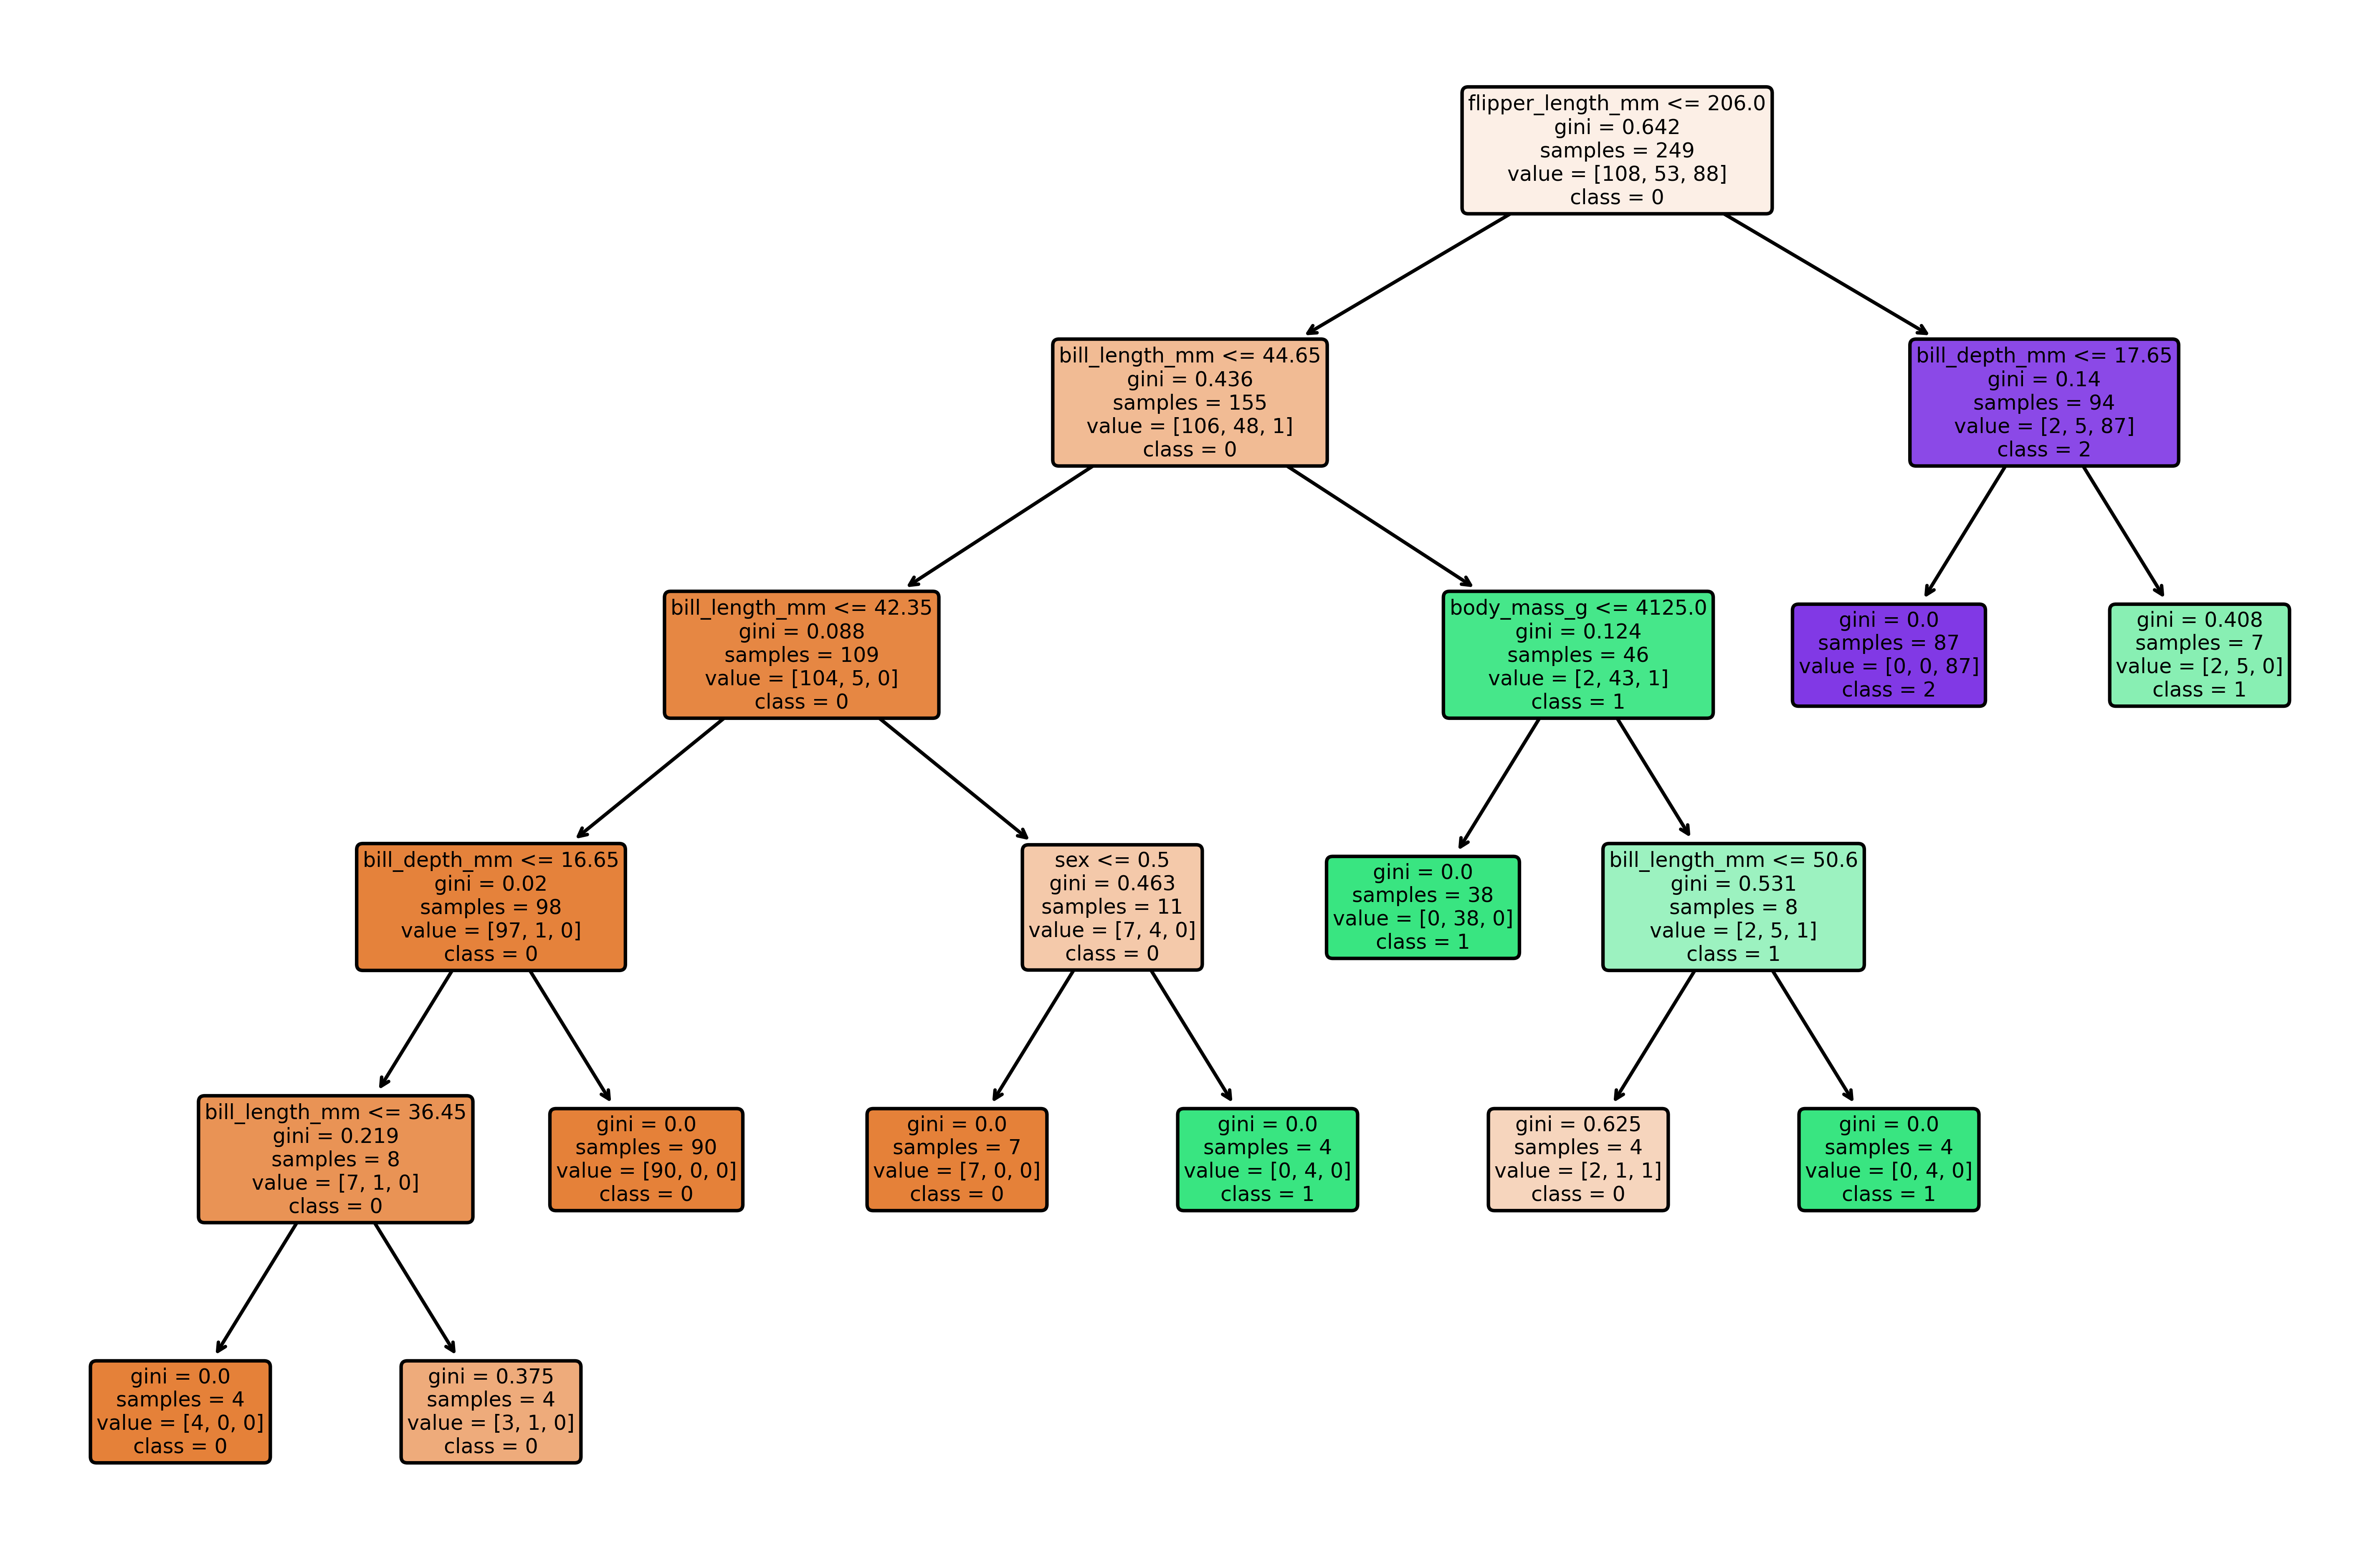

In [15]:
# The decision tree for the max depth = 6,min nodes = 4
import graphviz
max_depth = 6
min_samples_leaf = 4

clf = DecisionTreeClassifier(random_state=0,
                             min_samples_leaf=min_samples_leaf,
                             max_depth=max_depth
                            )
clf.fit(x_train, y_train)
feature_name = ['island','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g','sex']
class_names=['0','1','2']
plt.figure(figsize=(12,8), dpi=600)
plot_tree(clf, 
          feature_names = feature_name, 
          class_names = class_names,           
          filled = True, 
          rounded = True)
 
plt.savefig('tree_visualization.png')


In [ ]:
1.4 Bagging of trees

In [18]:
min_samples_leaf = 4
max_defth_list = [7,8,9]
n_estimators_list = [10,30,50]

for i in range(3):
    for j in range(3):
        max_depth = max_defth_list[i]
        n_estimators = n_estimators_list[j]
        dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, max_depth=max_depth)
        clf = BaggingClassifier(base_estimator=dt,n_estimators=n_estimators,random_state=0)
        clf.fit(x_train, y_train)
        print(f'----------max depth = {max_defth_list[i]},number of trees = {n_estimators_list[j]}------------  ')
        print(f"Train Accuracy : {clf.score(x_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(x_test, y_test)}") 

----------max depth = 7,number of trees = 10------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9880952380952381
----------max depth = 7,number of trees = 30------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------max depth = 7,number of trees = 50------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------max depth = 8,number of trees = 10------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9880952380952381
----------max depth = 8,number of trees = 30------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------max depth = 8,number of trees = 50------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------max depth = 9,number of trees = 10------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 0.9880952380952381
----------max depth = 9,number of trees = 30------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------max depth = 9,num

In [ ]:
1.5 Random forests

In [24]:
max_depth = 8
min_samples_split_list = [7,8,9]
n_estimators_list = [10,50,100]
for i in range(3):
    for j in range(3):
        min_samples_split = min_samples_split_list[i]
        n_estimators = n_estimators_list[j]
        clf = RandomForestClassifier(random_state=0,n_estimators=n_estimators,min_samples_split=min_samples_split,max_depth=max_depth)
        clf.fit(x_train, y_train)
        print(f'----------m = {min_samples_split_list[i]},number of trees = {n_estimators_list[j]}------------  ')
        print(f"Train Accuracy : {clf.score(x_train, y_train)}")
        print(f"Test  Accuracy : {clf.score(x_test, y_test)}") 

----------m = 7,number of trees = 10------------  
Train Accuracy : 1.0
Test  Accuracy : 0.9880952380952381
----------m = 7,number of trees = 50------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------m = 7,number of trees = 100------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------m = 8,number of trees = 10------------  
Train Accuracy : 1.0
Test  Accuracy : 0.9880952380952381
----------m = 8,number of trees = 50------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------m = 8,number of trees = 100------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------m = 9,number of trees = 10------------  
Train Accuracy : 1.0
Test  Accuracy : 0.9880952380952381
----------m = 9,number of trees = 50------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0
----------m = 9,number of trees = 100------------  
Train Accuracy : 0.9959839357429718
Test  Accuracy : 1.0


In [ ]:
1.6 Curves

In [25]:
from mlxtend.evaluate import bias_variance_decomp

In [26]:
n_estimators_list = list(range(10, 101, 10)) # 10, 20, ...., 100
bias_dict = {}
variance_dict = {}

from sklearn.ensemble import RandomForestRegressor


for ne in n_estimators_list:
    
    clf = RandomForestClassifier(random_state=0,n_estimators = ne)
    clf.fit(x_train, y_train)
    mse, bias, var = bias_variance_decomp(clf, x_train.values, y_train.values, x_test.values, y_test.values, loss='mse', random_seed=3020)
    bias_dict[ne] = bias**2
    variance_dict[ne] = var



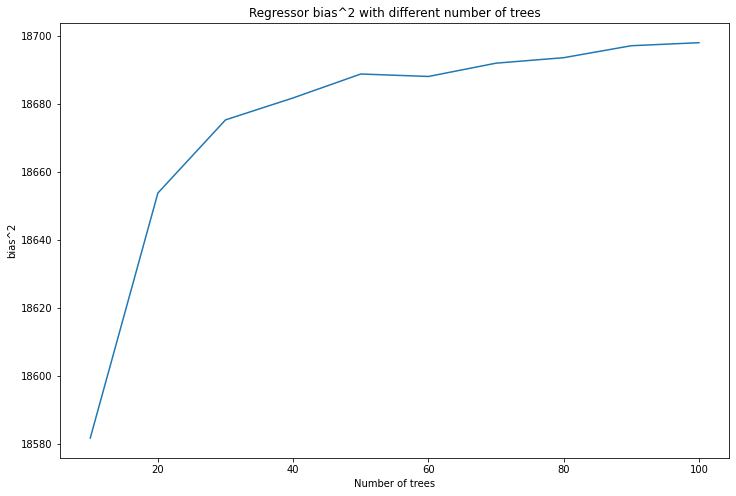

In [27]:
plt.figure(figsize=(12,8))
plt.plot(bias_dict.keys(), bias_dict.values())
plt.title("Regressor bias^2 with different number of trees")
plt.xlabel("Number of trees")
plt.ylabel("bias^2")
plt.savefig('6.png')
plt.show()

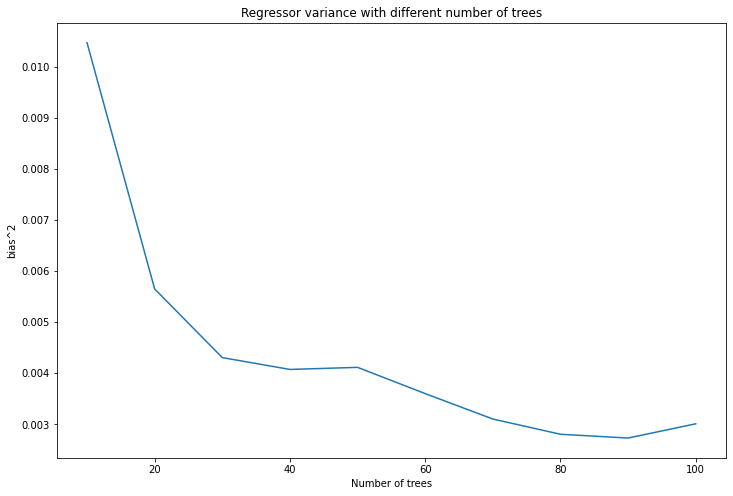

In [30]:
plt.figure(figsize=(12,8))
plt.plot(variance_dict.keys(), variance_dict.values())
plt.title("Regressor variance with different number of trees")
plt.xlabel("Number of trees")
plt.ylabel("bias^2")
plt.savefig('6.png')
plt.show()